In [34]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances
from sklearn.metrics import jaccard_score
from scipy.stats import pearsonr

# Assignment 1 Using OOPS CONCEPT

In [2]:
class LoadData:
    #reading the data as csv file using pandas
    #dropped all unwanted columns from the dataframe
    #converted string of list to list 
    def __init__(self, path):
        self.df = pd.read_csv(path)                                             
        needed_columns = {'acousticness', 'artists', 'danceability', 'energy', 'id', 'liveness', 'loudness', 'name', 'popularity', 'speechiness', 'tempo', 'valence'}
        drop_columns = {c for c in self.df.columns if c not in needed_columns}
        self.df.drop(columns=drop_columns, inplace=True)                        
        self.df['artists'] = self.df['artists'].apply(ast.literal_eval)         
    
    #function to load Artist dataset
    def loadArtist(self):                                                   
        expld_df = self.df.explode('artists')         
        combine_df = expld_df.groupby('artists')
        median_df = combine_df.median()
        artist_music = median_df.reset_index()              
        music_per_artist = combine_df.agg({'name':lambda x: set(x)})
        artist_music = artist_music.join(music_per_artist, on='artists', how="inner")
        return artist_music
    #function to load music dataset
    def loadMusic(self):
        combine_df = self.df.groupby('name')
        median_df = combine_df.median()
        music_features = median_df.reset_index()
        artist_per_music = self.df.explode('artists').groupby('name').agg({'artists':lambda x: set(x)})
        music_features = music_features.join(artist_per_music, on='name', how="inner")
        return music_features

In [9]:
class CheckSimilarity:
     #excluded all column other than integer datatype
    def __init__(self, data):
        self.data = data
        self.data = self.data.select_dtypes(exclude=['object'])     
     #function to compute cosine similarity which take 2 ids as parameter
    #iloc loads the entire row to the row_1
     # returns cosine similarity score
    def compute_cosine(self, id1, id2):              
        row1 = self.data.iloc[id1, :]                       
        row2 = self.data.iloc[id2, :]                       
        return cosine_similarity([row1.array],[row2.array])[0][0]   
    
    #function to compute euclidean similarity which take 2 ids as parameter
     # returns euclidean similarity score
    def compute_euclidean(self, id1, id2):            
        row1 = self.data.iloc[id1, :]
        row2 = self.data.iloc[id2, :]
        return euclidean_distances([row1.array],[row2.array])[0][0]         
    #function to compute manhattan similarity which take 2 ids as parameter
    # returns manhattan similarity score
    def compute_manhattan(self, id1, id2):           
        row1 = self.data.iloc[id1, :]
        row2 = self.data.iloc[id2, :]
        return manhattan_distances([row1.array],[row2.array])[0][0]                
    #function to compute jaccard similarity which take 2 ids as parameter
    # returns jaccard similarity score
    def compute_jaccard(self, id1, id2):             
        row1 = self.data.iloc[id1, :]
        row2 = self.data.iloc[id2, :]
        return jaccard_score(row1.array.astype(int),row2.array.astype(int),average='macro')    
    #function to compute pearson similarity which take 2 ids as parameter
     # returns pearson similarity score
    def compute_pearson(self, id1, id2):             
        row1 = self.data.iloc[id1, :]
        row2 = self.data.iloc[id2, :]
        return pearsonr(row1.array,row2.array)[0]  
    #function to call all the 5 similarity functions
    def get_similarity(self, method, id1, id2):            
        supported_similarity_methods = {                   
            'cosine':self.compute_cosine,
            'euclidean':self.compute_euclidean,
            'manhattan':self.compute_manhattan,
            'jaccard':self.compute_jaccard,
            'pearson':self.compute_pearson,
        }
        if method not in supported_similarity_methods.keys():            
            raise Exception(f"{method} not supported please use one of the following {', '.join(supported_similarity_methods.keys())}")
        else:
            return supported_similarity_methods[method](id1, id2)

In [17]:
data_loader = LoadData("./data.csv" )      #object for LoadData class
 #music dataset is loaded in music_features
 #artist dataset is loaded on artist_music
music_features = data_loader.loadMusic() 
artist_music = data_loader.loadArtist()      
#object for CheckSimilarity class
music_similarity = CheckSimilarity(music_features)
artist_similarity = CheckSimilarity(artist_music)

In [11]:
max_artist = max(artist_music.index)                  #to find out the last artist id available
max_music = max(music_features.index)               #to find out the last music id available
available_similarity_methods = ['cosine','euclidean','manhattan','jaccard','pearson']  
available_datas = ['artist_music','music_features']     

In [12]:
#Menu driven program to find 5 similarity functions
print("Welcome To Similarity Finder")
print("============================")
print("You can find similarity within artist or music.")
print("\nBasic Info")
print("----------")
print(f"Artist index start from 0 and ends at {max_artist}")
print(f"Music index start from 0 and ends at {max_music}")
print("\nAvailable Similarity Functions")
print("------------------------------")
for k,v in enumerate(available_similarity_methods,start=1):           #for loop to display similarity function
    print(f"{k}.{v}")
print("\nAvailable Data")
print("----------------")
for k,v in enumerate(available_datas,start=1):                                            #for loop to display available data
    print(f"{k}.{v}")

inp = 'y'                                                             
while inp not in ['n','no']:                                                 #the loop continues untill the user gives n or no
    condition_unmet = True
    while condition_unmet:                                                                    #loop to display similarity menu
        sim_fun = int(input("\nEnter similarity function number from menu:"))
        if sim_fun in range(1,len(available_similarity_methods)+1):
            condition_unmet = False
        else:
            print(f"Invalid input! Please enter a value from 1-{len(available_similarity_methods)}")  #program ask the user to give a proper value from the menu displayed
    condition_unmet = True
    while condition_unmet:                                                                       #loop to display available data
        sim_data = int(input("Enter data number from menu:"))
        if sim_data in range(1,len(available_datas)+1):
            condition_unmet = False
        else:
            print(f"Invalid input! Please enter a value 1-{len(available_datas)}")           #program ask the user to give a proper value from the menu displayed
    if sim_data == 1:
        id_max = max_artist
        similarity_obj = artist_similarity
    else:
        id_max = max_music
        similarity_obj = music_similarity
    condition_unmet = True
    while condition_unmet:
        id_data1 = int(input("Enter first id:"))                                         #program collects first id from user
        if id_data1 >= 0 and id_data1 <= id_max:
            condition_unmet = False
        else:
            print(f"Invalid input! Please enter a value from 0 and {id_max}")           #program ask the user to give a proper value
    condition_unmet = True
    while condition_unmet:
        id_data2 = int(input("Enter second id:"))                                       #program collects second id from user
        if id_data2 >= 0 and id_data2 <= id_max:
            condition_unmet = False
        else:
            print(f"Invalid input! Please enter a value from 0 and {id_max}")                #program ask the user to give a proper value
    #program displays the similarity score
    print(f"Similarity: {similarity_obj.get_similarity(available_similarity_methods[sim_fun-1], id_data1, id_data2)}")
    inp = input("\nDo you want to continue(y/n):")             #program ask whether the user to continue checking similarity or to exit from program

Welcome To Similarity Finder
You can find similarity within artist or music.

Basic Info
----------
Artist index start from 0 and ends at 132939
Music index start from 0 and ends at 27621

Available Similarity Functions
------------------------------
1.cosine
2.euclidean
3.manhattan
4.jaccard
5.pearson

Available Data
----------------
1.artist_music
2.music_features

Enter similarity function number from menu:2
Enter data number from menu:1
Enter first id:1
Enter second id:2
Similarity: 21.317579863811996

Do you want to continue(y/n):y

Enter similarity function number from menu:3
Enter data number from menu:1
Enter first id:2
Enter second id:1
Similarity: 30.258099999999992

Do you want to continue(y/n):y4

Enter similarity function number from menu:4
Enter data number from menu:1
Enter first id:1
Enter second id:2
Similarity: 0.14285714285714285

Do you want to continue(y/n):m

Enter similarity function number from menu:5
Enter data number from menu:1
Enter first id:2
Enter second i

# RECOMMENDATION SYSTEM

In [28]:
class Similarity(CheckSimilarity):                                  #class CheckSimilarity is being inherited in this class
    def get_similarity_list(self, method, id1):
        similarity_list = [self.get_similarity(method, id1, i) for i in self.data.index]
        return similarity_list
    
class Recommendation(LoadData):     
    #class LoadData is being inherited in this class
     #this function is used for recommendation vallidation
    #the no of recommendation cannot be 0 or more than the available data
    def __n_validator(self, n, id1, data):            
        if n >= data.shape[0] or n <= 0:
            raise Exception(f"n can only be a value from {0} and {data.shape[0]}")   
        if id1 not in data.index:                                                   
            raise Exception(f"id1 is an Invalid Index")
                                                                                
    def n_artist(self, n, id1, method, artist_features):                
        #funtion to return n most similar artist to target artist
        self.__n_validator(n, id1, artist_features) 
        n_similarity = Similarity(artist_features)                        #created an object for SimilarityList
        similarity_list = n_similarity.get_similarity_list(method, id1)
        sorted_index = np.argsort(similarity_list)                            
            sorted_index = sorted_index[::-1]
        n_index = sorted_index[1:n+1]
        recommendation = [artist_features.iloc[i,:].artists for i in n_index]  #List which store the recommended artist
        scores = [similarity_list[i] for i in n_index]                         
        return {'artist':artist_features.iloc[id1,:].artists, 'recommendation': recommendation, 'score':scores}
       
    def n_music(self, n, id1, method, music_features):                   
        #funtion to return n most similar music to target music
        self.__n_validator(n, id1, music_features)  
        n_similarity = Similarity(music_features)                         #created an object for SimilarityList
        similarity_list = n_similarity.get_similarity_list(method, id1)
        sorted_index = np.argsort(similarity_list)                           
        if method in ['cosine','jaccard','pearson']:
            sorted_index = sorted_index[::-1]
        n_index = sorted_index[1:n+1]
        recommendation = [music_features.iloc[i,:]['name'] for i in n_index]  #List which store the recommended music
        scores = [similarity_list[i] for i in n_index]                       
        return {'music':music_features.iloc[id1,:]['name'], 'recommendation': recommendation, 'score':scores}
    
    def n_artist_music(self, n, id1, method, artist_features):
        # Inorder to recommend a music for an artist, we ensure that his own music is not recommended
        # As each row in 'getArtistMusic' denotes a general characteristics of music for an artist
        # We find similar arist and then recommend the songs of those artist which will be similar to his music 
        self.__n_validator(n, id1, artist_features)
        n_similarity = SimilarityList(artist_features)
        similarity_list = n_similarity.get_similarity_list(method, id1)
        sorted_index = np.argsort(similarity_list)
        if method in ['cosine','jaccard','pearson']:
            sorted_index = sorted_index[::-1]
        n_index = sorted_index[1:n+1]
        recommendation = [m for i in n_index for m in artist_features.iloc[i,:]['name']]
        scores = [similarity_list[i] for i in n_index]
        return {'artist':artist_features.iloc[id1,:].artists, 'recommendation': recommendation[:n], 'score':scores}

In [29]:
recommender = Recommendation("./data.csv")                    #object for Recommendation class
artist_features = recommender.loadArtist()
music_features = recommender.loadMusic()

In [30]:
max_artist = max(artist_features.index)       #to find out the last music id available
max_music = max(music_features.index)      #to find out the last artist id available
available_similarity_methods = ['cosine','euclidean','manhattan','jaccard','pearson']  
available_recommendations = ['Artist-Artist Similarity','Music-Music Similarity', 'Music-Artist Similarity']  

In [33]:
#Menu driven program for Recommendation System
print("\t\t\tRecommendation System") 
print("The recommendation is based on either artist or music.\n\n")
print(f"Artist index start from 0 and ends at {max_artist}")           
print(f"Music index start from 0 and ends at {max_music}")   
print("\nChoose any Similarity Functions")
print("------------------------------")
for k,v in enumerate(available_similarity_methods,start=1):                    
    #for loop for displaying similarity functions
    print(f"{k}.{v}")
print("\nChoose any Recommendations")
print("----------------")
for k,v in enumerate(available_recommendations,start=1):                      
    #for loop to display available recommendation
    print(f"{k}.{v}")

inpt = 'y'
while inpt not in ['n','no']:                                           
    condition = True                               
    while condition:                                            
        sim_fun = int(input("\nEnter any similarity function number :"))
        if sim_fun in range(1,len(available_similarity_methods)+1):
            condition = False
        else:
            print(f"Invalid input! Please enter a value from 1-{len(available_similarity_methods)}")  
    condition = True
    while condition:                                              
        recommendation_no = int(input("Enter any recommendation number :"))
        if recommendation_no in range(1,len(available_recommendations)+1):
            condition = False
        else:
            print(f"Invalid input! Please enter a value 1-{len(available_recommendations)}")   
    if recommendation_no in [1,3]:
        id_max = max_artist
    else:
        id_max = max_music
    condition = True
    while condition:                            
        id_data = int(input("Enter the id:"))
        if id_data >= 0 and id_data <= id_max:
            condition = False
        else:
            print(f"Invalid input! Please enter a value from 0 and {id_max}")      
    condition = True
    while condition:
        n = int(input("Enter number of recommendations to be displayed:"))        
        #n is the no of recommendations to be displayed
        if n >= 1 and n <= id_max-1:
            condition = False
        else:
            print(f"Invalid input! Please enter a value from 1 and {id_max-1}")
    
    print("\nLoading Please Wait, !!!")        
    if recommendation_no == 1:                        
        r = recommender.n_artist(n, id_data, available_similarity_methods[sim_fun-1], artist_features)
        print(f"Recommenating top {n} artist-artist : {r['artist']}") 
        for c,rec in enumerate(r['recommendation'],start=1):
              print(f"{c}. {rec}")
    elif recommendation_no == 2:                             
        r = recommender.n_music(n, id_data, available_similarity_methods[sim_fun-1], music_features)
        print(f"Recommenating top {n} music-music : {r['music']}")
        for c,rec in enumerate(r['recommendation'],start=1):
              print(f"{c}. {rec}")
    else:                                                   
        r = recommender.n_artist_music(n, id_data, available_similarity_methods[sim_fun-1], artist_features)
        print(f"Recommenating top {n} music-artist : {r['artist']}")
        for c,rec in enumerate(r['recommendation'],start=1):
              print(f"{c}. {rec}")
    inpt = input("\nPress any key to continue or press n to exit:")         

			Recommendation System
The recommendation is based on either artist or music.


Artist index start from 0 and ends at 27621
Music index start from 0 and ends at 132939

Choose any Similarity Functions
------------------------------
1.cosine
2.euclidean
3.manhattan
4.jaccard
5.pearson

Choose any Recommendations
----------------
1.Artist-Artist Similarity
2.Music-Music Similarity
3.Music-Artist Similarity

Enter any similarity function number :1
Enter any recommendation number :1
Enter the id:1
Enter number of recommendations to be displayed:2

Loading Please Wait, !!!
Recommenating top 2 artist-artist : "Cats" 1983 Broadway Cast
1. Denise De Kalafe
2. Mort Garson

Press any key to continue or press n to exit:s

Enter any similarity function number :2
Enter any recommendation number :2
Enter the id:5
Enter number of recommendations to be displayed:2

Loading Please Wait, !!!
Recommenating top 2 music-music : "8" Teen
1. Theme Of Foxy Brown
2. I Want To Hold Your Hand

Press any key to

# Plot Accuracy

In [53]:
def accuracy_artist(artist_id, artist_features):     #function to compute accuracy
    output = {}   
    new_similarity_method=['cosine','jaccard','pearson']
    for m in new_similarity_method:                          
        print(f'Computing score for {m}')
        r = recommender.n_artist(1, artist_id, m, artist_features)
        output[m] = r
    similarity_name = []                                              #similarity name
    similarity_value = []                                             #similarity value
    dist_name = []                                              #distance name
    dist_value = []                                             #distance value
    for k,v in output.items():
        if k in ['manhattan','euclidean']:
            dist_name.append(f"{k}-{v['recommendation'][0]}")
            dist_value.append(v['score'][0])
        else:
            similarity_name.append(f"{k}-{v['recommendation'][0]}")
            similarity_value.append(v['score'][0])

    fig = plt.figure(figsize = (7, 3))
    plt.bar(s_name, s_value) 
    for index, value in enumerate(similarity_value):
        plt.text(similarity_name[index], value, str(round(value,5)))
    plt.xlabel("Method - Recommendation") 
    plt.ylabel("Similarity Score") 
    plt.title(f"Artist - Artist Similarity: {artist_features.iloc[[artist_id]].artists[artist_id]}") 
    plt.show()

   

Computing score for cosine
Computing score for jaccard
Computing score for pearson


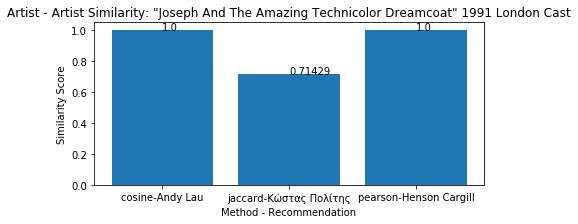

In [50]:
accuracy_artist(4, artist_features)

In [54]:
def accuracy_music(music_id, music_features):
    output = {}
    new_similarity_method=['cosine','jaccard','pearson']
    for m in new_similarity_method:
        print(f'Computing score for {m}')
        r = recommender.n_music(1, music_id, m, music_features)
        output[m] = r
    similarity_name = []
    similarity_value = []
    distance_name = []
    distance_value = []
    for k,v in output.items():
        if k in ['manhattan','euclidean']:
            distance_name.append(f"{k}-{v['recommendation'][0]}")
            distance_value.append(v['score'][0])
        else:
            similarity_name.append(f"{k}-{v['recommendation'][0]}")
            similarity_value.append(v['score'][0])

    fig = plt.figure(figsize = (6, 3))
    plt.bar(similarity_name, similarity_value) 
    for index, value in enumerate(similarity_value):
        plt.text(similarity_name[index], value, str(round(value,5)))
    plt.xlabel("Method - Recommendation") 
    plt.ylabel("Similarity Score") 
    plt.title(f"Music - Music Similarity for Music: {music_features.iloc[[music_id]].name[music_id]}") 
    plt.show()


Computing score for cosine
Computing score for jaccard
Computing score for pearson


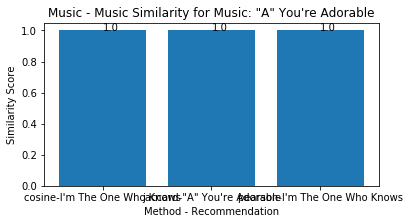

In [55]:
accuracy_music(6, music_features)